# Homework 3 - ASTRO 530 - Olivier Gilbert

## 1.

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy.optimize import curve_fit
plt.rcParams["font.family"] = "Times New Roman"
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['text.usetex'] = False
plt.rc("axes", labelsize=16) 

def mass_growth(M_0, t, beta):
    """M(t) = M_0/(1-\beta M_0 t) where \beta M_0 t<<1"""
    return M_0/(1-beta*M_0*t)

### a)

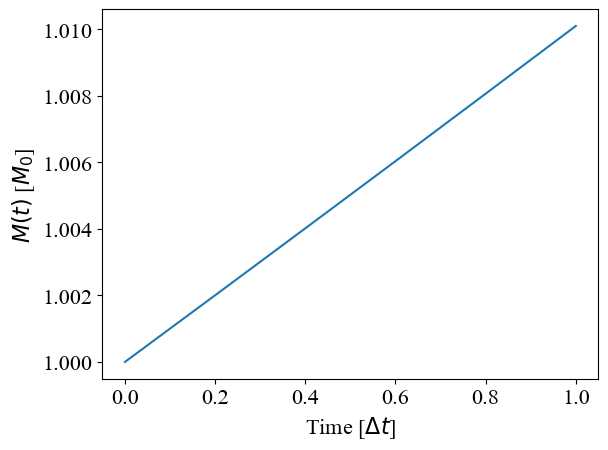

In [166]:
M_0 = 1 # in units of M_0
t = np.linspace(0,1,1000) # in units of Delta t
beta_ = 0.01 # in units of (M_0*Delta t)^-1
plt.plot(t,mass_growth(M_0,t,beta_))
plt.xlabel(r"Time [$\Delta t$]")
plt.ylabel(r"$M(t)$ [$M_0$]")
plt.show()

### b)

$$\beta = \frac{2\pi G^2 \rho_0}{\left(c_{s,0}^2 + v_0^2\right)^{3/2}}$$

Assuming the characteristic flow velocity $v_0$ is zero and characteristic values for molecular clouds ($\mathrm{H}_2$, $n=10^2\mathrm{cm^{-3}}$, $T=10\mathrm{K}$), we can calculate $\beta$ in [$M_\odot^{-1}\mathrm{Myr^{-1}}$] :

$$\rho_0 = n\cdot m_{\mathrm{H}_2} \quad \quad m_{\mathrm{H}_2} = 3.34\times10^{-24}\mathrm{g}$$
$$\rho_0 = 10^2\mathrm{cm^{-3}} \cdot 3.34\times10^{-24}\mathrm{g} = 3.34\times10^{-22}\mathrm{g/cm^3}$$

In [103]:
rho0 = 3.34E-22 # g cm^-3
T = 10 # K
k = 1.3807E-16 # erg K^-1
G = 6.674E-8 # cm^3 g^-1 s^-2
m_H = 1.67E-24 # g
mu = 2 # because we have H_2


c_s0 = np.sqrt(k*T/(mu*m_H)) # cm s^-1
beta = 2*np.pi*G**2*rho0/(c_s0**2)**(3/2) # g^-1 s^-1
beta = beta*1.989E33*3.1536E13 # M_odot^-1 Myr^-1
print("c_s0",c_s0)
print("beta",beta)

c_s0 20331.828091269464
beta 0.06976070209130501


$$\beta = 6.976\times 10^{-2} \, [M_\odot^{-1}\mathrm{Myr^{-1}}]$$

### c)

In [300]:
def plot_dists(recording_of_masses, times):
    def plot_dist(dist, ax:plt.Axes, t, fit_pl=False, **kwargs):
        counts, bin_edges = np.histogram(dist, bins=50, density=False)
        mass_bins = np.array([(bin_edges[i]+bin_edges[i+1])/2 for i in range(len(bin_edges)-1)])
        ax.stairs(counts, bin_edges, fill=True, alpha=0.5, label=f"T={t:.2f} Myr", **kwargs)

        ax.set_xlabel(r"$M$ [$M_\odot$]", fontsize=15)
        ax.set_ylabel(r"N", fontsize=15)
        ax.legend(fontsize=15)
    plt.figure(figsize=(18,3))
    ax1 = plt.subplot(131)
    ax2 = plt.subplot(132)
    ax3 = plt.subplot(133)
    plot_dist(np.array(recording_of_masses)[:,0],ax1,times[0], color="blue", fit_pl=True)
    plot_dist(np.array(recording_of_masses)[:,int(len(times)/2)],ax2,times[int(len(times)/2)], color="orange", fit_pl=True)
    plot_dist(np.array(recording_of_masses)[:,-1],ax3,times[-1], color="red", fit_pl=True)
    plt.show()

3.3333333333333335


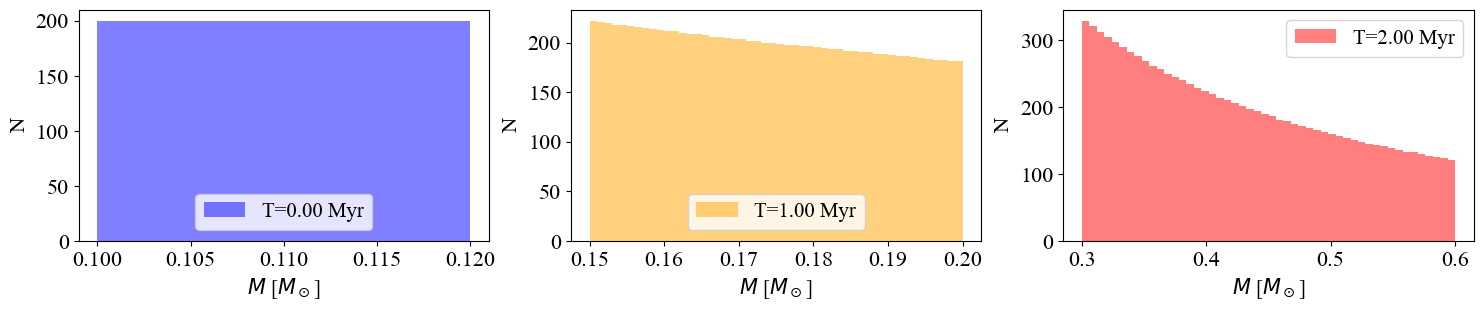

In [301]:
# Evolve the masses
set_of_masses = np.linspace(0.1,0.12,10000) # in M_odot
times = np.linspace(0,2,10000) # in Myr
recording_of_masses = []
beta = 0.8/(times[-1]*np.max(set_of_masses))
print(beta)
for m0 in set_of_masses:
    recording_of_masses.append(mass_growth(m0, times, beta))
# Plot the initial, intermediate, and final mass distribution
plot_dists(recording_of_masses,times)

We use $\beta=3.33$ instead of the beta found in b) since it is not steep enough for us to see the evolution in only 2Myr otherwise. Thsi value is chosen because we know $\beta M_0 t < 1$, so isolating $\beta$ gives us $$\beta < \frac{1}{M_0 t}$$
To choose a value, we use the highest initial mass (0.12$M_\odot$) and the latest time (2\mathrm{Myr}), and multiply the result by 0.8 to make sure it doesn't violate the constraint, which gives us $\beta=3.33$.

We see that the initially uniform distribution ends its evolution after 2Myr with all masses having accreted, but lower masses being more common than higher masses.

### d)

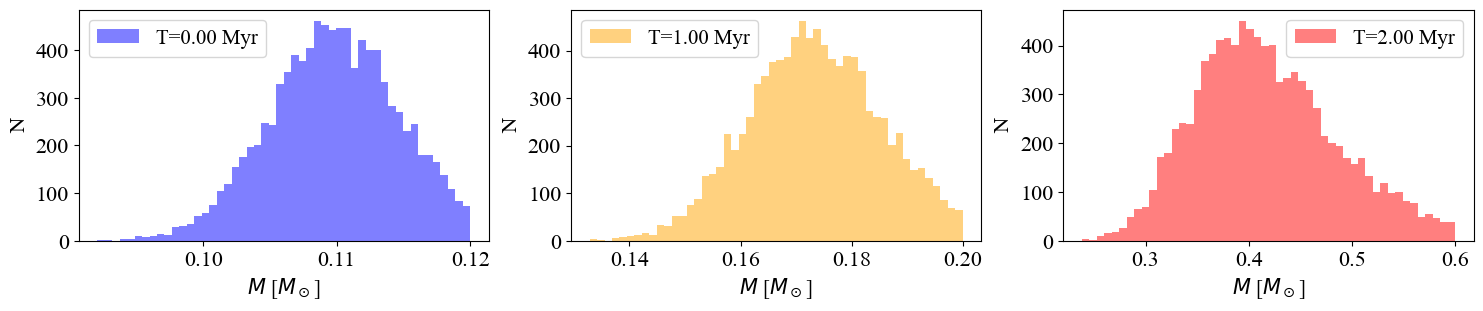

In [304]:
# Evolve the masses with non-uniform prior masses
from scipy.stats import norm
set_of_masses = np.random.normal(loc=0.11, scale=0.005, size=10000) # in M_odot
set_of_masses = set_of_masses[(set_of_masses < 0.12)] # Make sure our beta constraint isn't violated by masses higher than 0.12, which we used to calculate our limit.
recording_of_masses = []
for m0 in set_of_masses:
    recording_of_masses.append(mass_growth(m0, times, beta))
plot_dists(recording_of_masses,times)

We see the initially normal distribution of masses ends its evolution at 2Myr with a skewness, being steeper at low masses than high masses. The most common mass was displaced to the left of the median, which is exactly what we observed for c).

## 2.

### a)

We have the following diffusion equation to describe the temperature in the inner regions of the cloud:
$$\frac{\mathrm{d}T}{\mathrm{d}r} = - \frac{3\kappa_R \rho L}{64 \pi \sigma T^3 r^2}$$
with $\kappa_R$ being the Rosseland mean opacity, defined as 
$$\kappa_R = \kappa_0 \left(\frac{T}{T_0} \right)^\beta$$
and $\rho$ described by
$$\rho = \rho_0 \left(\frac{r}{r_0} \right)^{-3/2}$$


We want to show that the temperature should depend upon radius as $T\propto r^\frac{-5}{{2(4-\beta)}}$ for large optical depth ($T\to 0$ and $r\to \infty$).

We can start by substituting $\rho$ and $\kappa_R$ back into the diffusion equation and integrating it:

\begin{align*}
\frac{\mathrm{d}T}{\mathrm{d}r} &= - \frac{3\kappa_R \rho L}{64 \pi \sigma T^3 r^2} \\
\frac{\mathrm{d}T}{\mathrm{d}r} &= - \frac{3\kappa_0 \rho_0 L}{64 \pi \sigma T^3 r^2}\left(\frac{T}{T_0} \right)^\beta\left(\frac{r}{r_0} \right)^{-3/2} \\
\frac{\mathrm{d}T}{\mathrm{d}r} &= - \frac{3\kappa_0 \rho_0 L}{64 \pi \sigma T_0^{\beta} r_0^{-3/2}}T^{-(3-\beta)}r^{-7/2} \\
T^{(3-\beta)}\mathrm{d}T &= - \frac{3\kappa_0 \rho_0 L}{64 \pi \sigma T_0^{\beta} r_0^{-3/2}}r^{-7/2} \mathrm{d}r\\
\int T^{(3-\beta)}\mathrm{d}T &= - \frac{3\kappa_0 \rho_0 L}{64 \pi \sigma T_0^{\beta} r_0^{-3/2}}\int r^{-7/2} \mathrm{d}r\\
\frac{T^{(4-\beta)}}{4-\beta} &= - \frac{3\kappa_0 \rho_0 L}{64 \pi \sigma T_0^{\beta} r_0^{-3/2}} \frac{r^{-5/2}}{-5/2}+C\\
&\text{Where $C$ is a constant.} \\
T^{(4-\beta)} &= \frac{3\kappa_0 \rho_0 L (4-\beta)}{160 \pi \sigma T_0^{\beta} r_0^{-3/2}} r^{-5/2}+C\\
T &= \left[\frac{3\kappa_0 \rho_0 L (4-\beta)}{160 \pi \sigma T_0^{\beta} r_0^{-3/2}}\right]^{(4-\beta)} r^{\frac{-5}{2(4-\beta)}}+C\\
T &\propto  r^{\frac{-5}{2(4-\beta)}}\\
& \square
\end{align*}


### b)

$$B_\nu = \frac{8\pi h\nu^3}{c^3} \frac{1}{e^\frac{h\nu}{kT}-1}$$

$$\kappa_P = \frac{\int_0^\infty \kappa_\nu B_\nu \mathrm{d}\nu}{B}$$
$$\kappa_P \propto \frac{\int_0^\infty \lambda^{-\gamma} B_\nu \mathrm{d}\nu}{B}$$
$$\kappa_P \propto \frac{1}{B}\int_0^\infty \frac{\nu^{\gamma+3}}{e^\frac{h\nu}{kT}-1} \mathrm{d}\nu$$
We can easily recognize this to be a Bose integral (see https://www.robertobigoni.it/English/Matematica/Integrali/IntegraliBose/BoseIntegrals.html), and we can directly find the result:

$$\kappa_P \propto \frac{1}{B} \Gamma(\gamma+4)\zeta(\gamma+4)\left(\frac{kT}{h}\right)^{\gamma+4}$$

where $\Gamma(x)$ is the Gamma function and $\zeta(x)$ the Riemann-Zeta function, which can both be treated as constants. Substituting $B$ for its expression $\sigma T^4$, we can show the correct proof:

$$\kappa_P \propto \frac{1}{\sigma T^4} \left(\frac{kT}{h}\right)^{\gamma+4}$$
$$\kappa_P \propto  \left(\frac{k}{h}\right)^{\gamma+4} \frac{T^{\gamma+4}}{\sigma T^4}$$
$$\kappa_P \propto  T^{\gamma}$$

We now want to show that for $J \propto r^{-2}$, $T\propto r^{-2/(4+\gamma)}$:

\begin{align*}
    \int_0^\infty \kappa_\nu(J_\nu-B_\nu)\mathrm{d}\nu &= 0 \\
    \int_0^\infty \kappa_\nu J_\nu\mathrm{d}\nu - \int_0^\infty \kappa_\nu B_\nu\mathrm{d}\nu &= 0 \\
    \int_0^\infty \kappa_\nu J_\nu\mathrm{d}\nu &= \int_0^\infty \kappa_\nu B_\nu\mathrm{d}\nu \\
\end{align*}

We know that $J\propto r^{-2}$, so the term on the left will also be $\propto r^{-2}$ as there is no dependency on $r$ in $\kappa_\nu$. Also, we have already found the term on the right to be proportionnal to $T^{\gamma+4}$. We can therefore drop the equality sign for a proportionnal to sign and replace the terms by these values:


\begin{align*}
   r^{-2} &\propto T^{\gamma+4} \\
   r^{-2/(\gamma+4)} &\propto T \\
   \square
\end{align*}

At long wavelengths, where $\gamma \propto 2$, we would then have $T\propto r^{-1/3}$.

### c)

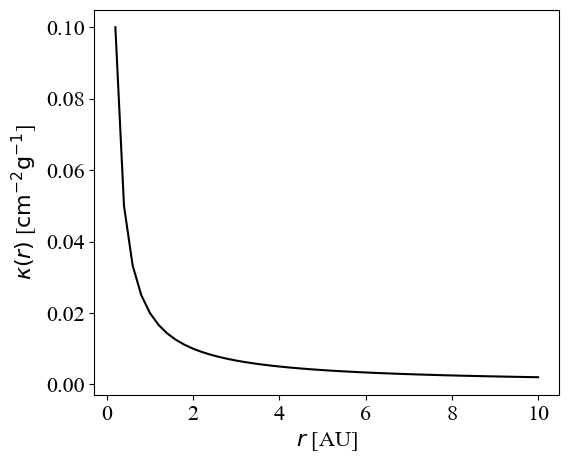

In [5]:
# Steady spherical infall
infall = 2.5E-6 # M_odot yr^-1
proto_mass = 0.3 # M_odot
lum = 1 # L_odot
kappa_r = lambda T: 20*T/1000 # cm^2 g^-1

radii = np.linspace(0.2,10) # AU
Temps = 1/radii

plt.figure(figsize=(6,5))
plt.plot(radii, kappa_r(Temps), color="black")
plt.xlabel(rf"$r$ [AU]")
plt.ylabel(r"$\kappa(r)$ [$\mathrm{cm^{-2} g^{-1}}$]")
plt.show()